In [1]:
# supress unnecessary warnings so the notebook looks clean
import warnings
warnings.filterwarnings('ignore')

# import libraries to quickly analyze data
import random
import numpy as np
import pandas as pd
pd.set_option('precision', 4)

# import plotting libraries
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline
#sns.set(style="white", palette="muted", color_codes=True)

## Data Analysis

In [2]:
data = pd.read_csv("datasets/creditcard.csv")

There are 284807 rows with 28 transformed feature columns V1-V28 and 3 original features Time, Amount and Class label.

In [3]:
# features available in training data
feature_list = []
for column, _ in data.iloc[1,:].iteritems():
    feature_list.append(column)
        
# check datatype of features
data[feature_list].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [4]:
# check missing values in the data
print("Number of missing values in the data:", data.isnull().sum().sum())

Number of missing values in the data: 0


In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.0000,2.8481e+05,2.8481e+05,2.8481e+05,2.8481e+05,2.8481e+05,2.8481e+05,2.8481e+05,2.8481e+05,2.8481e+05,...,2.8481e+05,2.8481e+05,2.8481e+05,2.8481e+05,2.8481e+05,2.8481e+05,2.8481e+05,2.8481e+05,284807.0000,284807.0000
mean,94813.8596,3.9196e-15,5.6882e-16,-8.7691e-15,2.7823e-15,-1.5526e-15,2.0107e-15,-1.6942e-15,-1.9270e-16,-3.1370e-15,...,1.5373e-16,7.9599e-16,5.3676e-16,4.4581e-15,1.4530e-15,1.6991e-15,-3.6602e-16,-1.2060e-16,88.3496,0.0017
std,47488.1460,1.9587e+00,1.6513e+00,1.5163e+00,1.4159e+00,1.3802e+00,1.3323e+00,1.2371e+00,1.1944e+00,1.0986e+00,...,7.3452e-01,7.2570e-01,6.2446e-01,6.0565e-01,5.2128e-01,4.8223e-01,4.0363e-01,3.3008e-01,250.1201,0.0415
min,0.0000,-5.6408e+01,-7.2716e+01,-4.8326e+01,-5.6832e+00,-1.1374e+02,-2.6161e+01,-4.3557e+01,-7.3217e+01,-1.3434e+01,...,-3.4830e+01,-1.0933e+01,-4.4808e+01,-2.8366e+00,-1.0295e+01,-2.6046e+00,-2.2566e+01,-1.5430e+01,0.0000,0.0000
25%,54201.5000,-9.2037e-01,-5.9855e-01,-8.9036e-01,-8.4864e-01,-6.9160e-01,-7.6830e-01,-5.5408e-01,-2.0863e-01,-6.4310e-01,...,-2.2839e-01,-5.4235e-01,-1.6185e-01,-3.5459e-01,-3.1715e-01,-3.2698e-01,-7.0840e-02,-5.2960e-02,5.6000,0.0000
50%,84692.0000,1.8109e-02,6.5486e-02,1.7985e-01,-1.9847e-02,-5.4336e-02,-2.7419e-01,4.0103e-02,2.2358e-02,-5.1429e-02,...,-2.9450e-02,6.7819e-03,-1.1193e-02,4.0976e-02,1.6594e-02,-5.2139e-02,1.3421e-03,1.1244e-02,22.0000,0.0000
75%,139320.5000,1.3156e+00,8.0372e-01,1.0272e+00,7.4334e-01,6.1193e-01,3.9856e-01,5.7044e-01,3.2735e-01,5.9714e-01,...,1.8638e-01,5.2855e-01,1.4764e-01,4.3953e-01,3.5072e-01,2.4095e-01,9.1045e-02,7.8280e-02,77.1650,0.0000
max,172792.0000,2.4549e+00,2.2058e+01,9.3826e+00,1.6875e+01,3.4802e+01,7.3302e+01,1.2059e+02,2.0007e+01,1.5595e+01,...,2.7203e+01,1.0503e+01,2.2528e+01,4.5845e+00,7.5196e+00,3.5173e+00,3.1612e+01,3.3848e+01,25691.1600,1.0000


The class label has two values: class 0  is normal transactions and class 1 is fraudulent transactions.

In [6]:
# count the number of unique values in column 'Class'
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

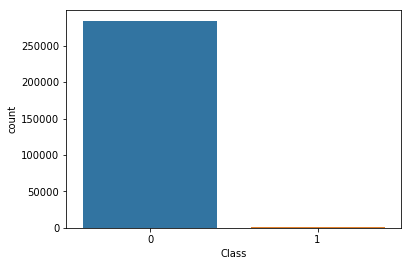

In [7]:
sns.countplot(data['Class'])

### 1. Shopping Time vs. Class

Working with dates and times can be tricky, especially when dealing with timezone conversions. This [guide][guide] will provide an overview of Python's datetime module with an emphasis on timezone related functions.

[guide]:https://howchoo.com/g/ywi5m2vkodk/working-with-datetime-objects-and-timezones-in-python

In [8]:
import time
from datetime import datetime
from tzlocal import get_localzone 

print("Local timezone :", get_localzone()) 
print("UTC datetime now:", datetime.utcnow())
print("Local datetime now:", datetime.now())
print("UTC beginning datetime:", datetime.utcfromtimestamp(3))
#print("Local beginning datetime:", datetime.fromtimestamp(3)) #Patches are in the works and it will be fixed soon

Local timezone : Asia/Taipei
UTC datetime now: 2017-09-21 03:45:38.708087
Local datetime now: 2017-09-21 11:45:38.708087
UTC beginning datetime: 1970-01-01 00:00:03


In [9]:
data['Second'] = data.Time.apply(lambda x: datetime.utcfromtimestamp(x))
data['Hour'] = data.Second.dt.hour
data[['Second','Hour']].tail()

,Second,Hour
284802,1970-01-02 23:59:46,23
284803,1970-01-02 23:59:47,23
284804,1970-01-02 23:59:48,23
284805,1970-01-02 23:59:48,23
284806,1970-01-02 23:59:52,23


In [10]:
data.pivot_table(values='Amount',index='Hour',columns='Class',aggfunc='count').T

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Class,,,,,,,,,,,,,,,,,,,,,
0,7689,4210,3271,3475,2186,2979,4092,7220,10267,15822,...,16547,16435,16431,16137,17006,15630,16738,17687,15432,10917
1,6,10,57,17,23,11,9,23,9,16,...,23,26,22,29,33,19,18,16,9,21


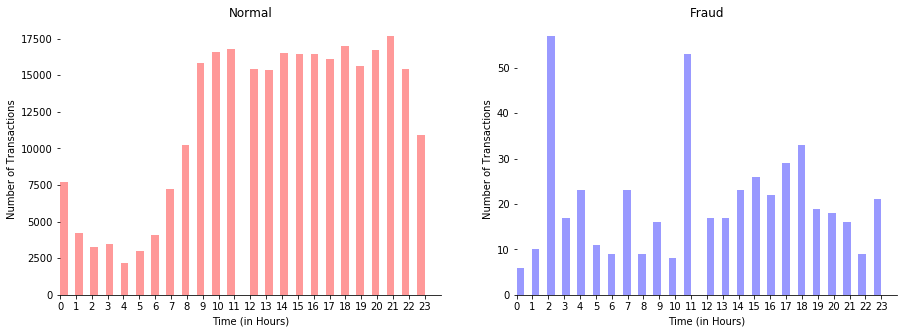

In [11]:
# set up the matplotlib figure
f, axes = plt.subplots(1,2, figsize=(15, 5), sharex=True)
sns.despine(left=True)

sns.distplot(data.Hour[data.Class == 0], bins=48, kde=False, color="r", ax=axes[0]).set_title('Normal')
sns.distplot(data.Hour[data.Class == 1], bins=48, kde=False, color="b", ax=axes[1]).set_title('Fraud')

for i in (0,1):
    axes[i].set_xlabel('Time (in Hours)')
    axes[i].set_ylabel('Number of Transactions')
    axes[i].set_xlim(0,24)
    axes[i].set_xticks(range(24))
plt.show()

2 A.M. has an unsual uptick for the number of frauds committed. One thing clear is that the fraud transactions are better spread out than the normal transactions. This can be due to the fact that there are very few fradulent transactions and hence they won't have a clear trend like in the case of normal transactions. We can also see this happened by computing the correlation between classes.

In [12]:
data.Hour.corr(data.Class, method='pearson')

-0.017108561324646467

In [13]:
data = data.drop(["Time","Hour","Second"], axis =1)

### 2. Transaction Amount  vs. Class

Fraudulent transactions have a maximum value far less than normal transactions,\$2,125.87 vs \$25,691.16.

In [14]:
print('Maximal vale of normal transaction:', max(data.Amount[data.Class == 0]))
print('-'*50)
print('Maximal vale of fraudulent transaction:', max(data.Amount[data.Class == 1]))

Maximal vale of normal transaction: 25691.16
--------------------------------------------------
Maximal vale of fraudulent transaction: 2125.87


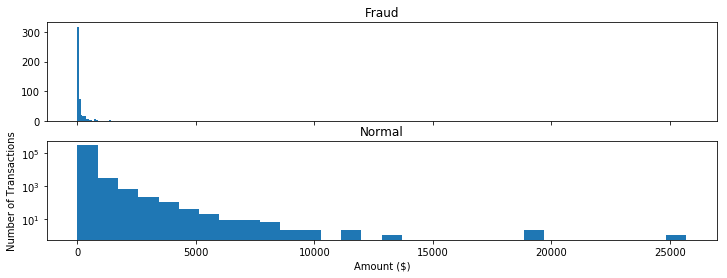

In [15]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
bins = 30

ax1.hist(data.Amount[data.Class == 1], bins = bins)
ax1.set_title('Fraud')
ax2.hist(data.Amount[data.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

In [16]:
data['Amount_max_fraud'] = 1
data.loc[data.Amount <= max(data.Amount[data.Class == 1]), 'Amount_max_fraud'] = 0
data['Amount_max_fraud'].value_counts()

0    284204
1       603
Name: Amount_max_fraud, dtype: int64

Plotting probability density function and cummulative density function can help us to visualize the relationship between transaction amount and classes. 

In [17]:
def pdf_cdf(data, percentile, title):

    # drop values above the choosen percentile
    data = data.drop(data[data > data.quantile(percentile)].index)
    
    data_size=len(data)

    # set bins edges
    data_set=sorted(set(data))
    bins = 100
    #bins=np.append(data_set, data_set[-1]+1)

    # use the histogram function to bin the data
    counts, bin_edges = np.histogram(data, bins=bins, density=False)

    counts=counts.astype(float)/data_size

    # find the cdf
    cdf = np.cumsum(counts)

    # plot the figures
    plt.figure(figsize=(15, 10))
    
    plt.subplot(221) # equivalent to: plt.subplot(2, 2, 1)
    plt.plot(bin_edges[0:-1], counts,linestyle='--', marker="o", color='b')
    plt.title('PDF - '+title, fontsize=20)
     
    plt.subplot(222) # equivalent to: plt.subplot(2, 2, 1)
    plt.plot(bin_edges[0:-1], cdf,linestyle='--', marker="o", color='b')
    plt.title('CDF - '+title, fontsize=20)

    plt.show()

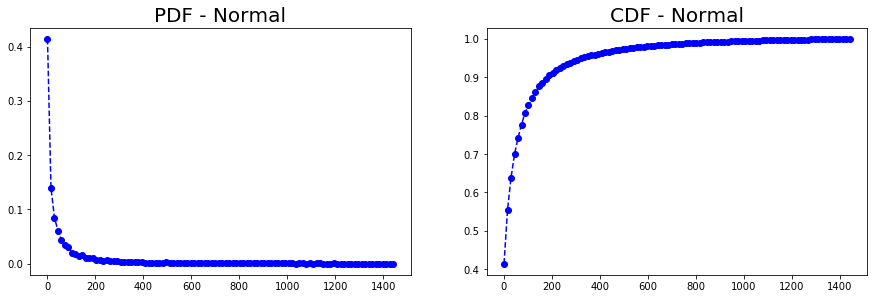

In [18]:
pdf_cdf(data.Amount[data.Class == 0], 0.995, 'Normal')

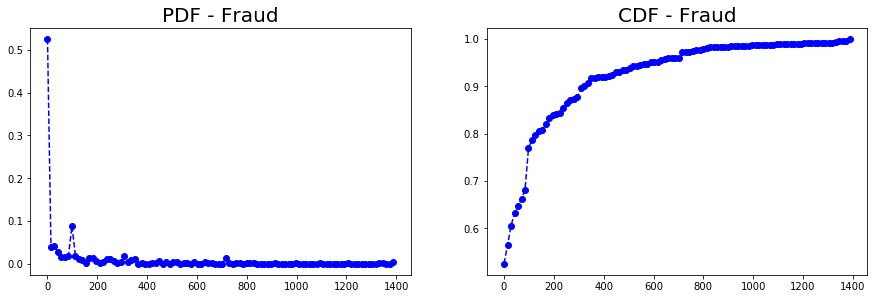

In [19]:
pdf_cdf(data.Amount[data.Class == 1], 0.995, 'Fraud')

Nothing useful here. Also the correlation between amount and class is small. 

In [20]:
data.Amount.corr(data.Class, method='pearson')

0.0056317530067685941

#### Hypothesis Test:

It would be interesting to see if fraudulent transactions are in general of higher value than normal transactions or not. To check this lets setup a hypothesis test. Lets define our Null and Alternative hypothesis

    H0 : Fraudulent transactions are of similar or lower value as normal transactions
    HA : Fraudulent transactions are of higher value as normal transactions

I took H0 to be similar or lower because H0 and HA should together cover all the possibilities

For the hypothesis test I will be performing a Z-test, with the valid transactions acting as the population. Though a T-test can also be performed but given that our sample set (fraudulent transactions) is of size 492 there shouldn't be any difference, as for sample set >= 30 the t distribution and z distribution are nearly the same.

Lets start. We will be performing the test for 99% significance level, this means that we should get a z-score of at least 2.326 or higher. 

In [21]:
population = data[data.Class == 0].Amount
sample = data[data.Class == 1].Amount

sampleMean = sample.mean()
populationStd = population.std()
populationMean = population.mean()

z_score = (sampleMean - populationMean) / (populationStd / sample.size ** 0.5)
z_score

3.008289898215099

As the z-score is more than 2.326 we reject the Null hypothesis. So there is a 99% chance that the amount spend on fraudulent transactions are on average significantly higher than normal transactions. But as we observed in the histograms in absolute terms normal transactions are of higher value.

In [22]:
data = data.drop(["Amount","Amount_max_fraud"], axis =1)

### 3. V1-V28 vs. Class

Lets now perform a hypothesis test for each of the 28 features to see if the feature value for the fraud data is significantly different from the normal transaction or not. The significance level for this experiment will be 99% and it will be a 2-tailed test. The corresponding z-critical value is 3.37.

In [23]:
# select only the anonymized features
v_features = [x for x in data.columns if 'V' in x]
#v_features = data.iloc[:,0:28].columns

normal_transactions = data[data.Class == 0]
fraud_transactions = data[data.Class == 1]

# get the number of rows
sample_size = fraud_transactions.shape[0]
for col in v_features:
    mean = normal_transactions[col].mean()
    std = normal_transactions[col].std()
    zScore = (fraud_transactions[col].mean() - mean) / (std/sample_size**0.5)
    print ('Column', col, 'is', 'Significant' if abs(zScore) >= 3.37 else 'insignificant')

Column V1 is Significant
Column V2 is Significant
Column V3 is Significant
Column V4 is Significant
Column V5 is Significant
Column V6 is Significant
Column V7 is Significant
Column V8 is Significant
Column V9 is Significant
Column V10 is Significant
Column V11 is Significant
Column V12 is Significant
Column V13 is insignificant
Column V14 is Significant
Column V15 is insignificant
Column V16 is Significant
Column V17 is Significant
Column V18 is Significant
Column V19 is Significant
Column V20 is Significant
Column V21 is Significant
Column V22 is insignificant
Column V23 is insignificant
Column V24 is Significant
Column V25 is insignificant
Column V26 is insignificant
Column V27 is Significant
Column V28 is Significant


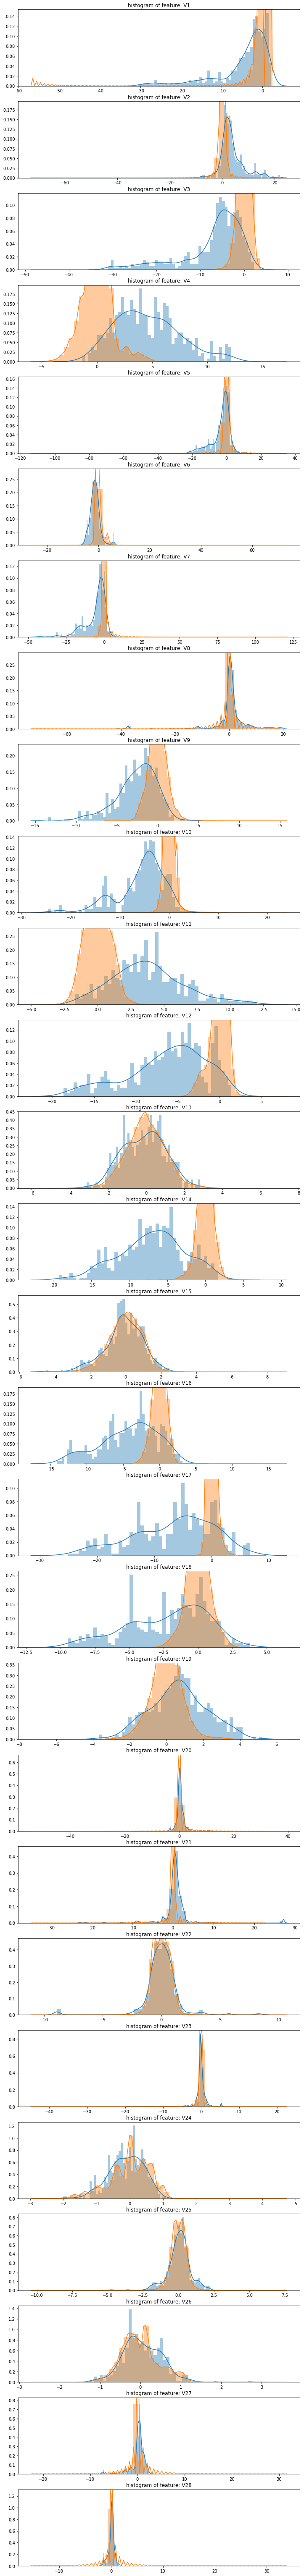

In [24]:
# let's visualize the distribution
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(data[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(data[cn][data.Class == 1], bins=50)
    sns.distplot(data[cn][data.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

In [25]:
# drop all of the features that have very similar distributions between the two types of transactions.
data = data.drop(['V8','V13','V15','V20','V22','V23','V24','V25','V26','V27','V28'], axis =1)

Based on the plots above, these features are created to identify values where fraudulent transaction are more common.

In [26]:
data['V1_']  = data.V1.map(lambda x: 1 if x < -3 else 0)
data['V2_']  = data.V2.map(lambda x: 1 if x > 2.5 else 0)
data['V3_']  = data.V3.map(lambda x: 1 if x < -4 else 0)
data['V4_']  = data.V4.map(lambda x: 1 if x > 2.5 else 0)
data['V5_']  = data.V5.map(lambda x: 1 if x < -4.5 else 0)
data['V6_']  = data.V6.map(lambda x: 1 if x < -2.5 else 0)
data['V7_']  = data.V7.map(lambda x: 1 if x < -3 else 0)
data['V9_']  = data.V9.map(lambda x: 1 if x < -2 else 0)
data['V10_'] = data.V10.map(lambda x: 1 if x < -2.5 else 0)
data['V11_'] = data.V11.map(lambda x: 1 if x > 2 else 0)
data['V12_'] = data.V12.map(lambda x: 1 if x < -2 else 0)
data['V14_'] = data.V14.map(lambda x: 1 if x < -2.5 else 0)
data['V16_'] = data.V16.map(lambda x: 1 if x < -2 else 0)
data['V17_'] = data.V17.map(lambda x: 1 if x < -2 else 0)
data['V18_'] = data.V18.map(lambda x: 1 if x < -2 else 0)
data['V19_'] = data.V19.map(lambda x: 1 if x > 1.5 else 0)
data['V21_'] = data.V21.map(lambda x: 1 if x > 0.6 else 0)

Here we are going to use [pandas.core.style.Styler][pandas.core.style.Styler] to help us to visualize the correlation between anonymized features.

[pandas.core.style.Styler]:https://pandas.pydata.org/pandas-docs/stable/style.html

In [27]:
features = data.columns[0:28]
corr_V = data[features].corr(method='pearson')
cmap = sns.diverging_palette(100, 300, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '300px'),
                        ('font-size', '12pt')])]

corr_V.style.background_gradient(cmap, axis=1) \
    .set_properties(**{'max-width': '80px', 'font-size': '8pt'}) \
    .set_precision(1)\
    .set_table_styles(magnify())

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,V21,Class,V1_,V2_,V3_,V4_,V5_,V6_,V7_,V9_,V10_,V11_
V1,1,5e-17,-1e-15,2e-17,6e-17,2e-16,2e-15,2e-16,7e-17,2e-16,2e-16,9e-16,6e-16,-5e-16,3e-16,2e-16,-2e-16,-0.1,-0.6,-0.4,-0.4,-0.1,-0.3,-0.3,-0.3,-0.08,-0.2,-0.08
V2,5e-17,1,3e-16,-1e-16,-2e-16,5e-16,4e-16,-6e-17,-5e-16,9e-16,-7e-16,-3e-16,5e-17,-1e-15,3e-16,1e-16,8e-17,0.09,-0.08,0.4,0.04,-0.004,-0.009,-0.3,0.02,-0.03,0.02,0.04
V3,-1e-15,3e-16,1,-3e-16,-1e-15,1e-15,2e-15,-4e-16,6e-16,-6e-17,2e-16,4e-16,1e-15,5e-17,5e-16,3e-16,-3e-17,-0.2,-0.2,-0.3,-0.4,0.03,-0.3,-0.08,-0.2,-0.03,-0.2,-0.06
V4,2e-17,-1e-16,-3e-16,1,-2e-15,-3e-16,2e-16,4e-16,6e-16,-2e-16,-6e-16,-9e-17,-7e-16,-4e-16,1e-16,-3e-16,-1e-16,0.1,0.04,-0.01,0.08,0.6,0.08,0.09,0.08,-0.08,0.04,0.07
V5,6e-17,-2e-16,-1e-15,-2e-15,1,8e-16,-4e-16,4e-16,-7e-16,7e-16,4e-16,-4e-16,-4e-16,1e-16,1e-15,-3e-16,-1e-16,-0.09,-0.06,-0.2,-0.2,0.03,-0.4,0.2,0.01,-0.08,-0.2,-0.02
V6,2e-16,5e-16,1e-15,-3e-16,8e-16,1,1e-16,1e-16,3e-16,5e-16,2e-16,3e-16,-2e-16,4e-16,3e-16,3e-16,-2e-16,-0.04,-0.05,-0.03,0.01,0.1,0.1,-0.2,-0.05,0.02,0.05,-0.02
V7,2e-15,4e-16,2e-15,2e-16,-4e-16,1e-16,1,8e-16,3e-17,-1e-15,2e-15,-2e-16,3e-16,1e-15,-1e-16,-3e-16,2e-16,-0.2,-0.2,-0.2,-0.08,-0.04,0.07,-0.2,-0.5,-0.07,-0.1,-0.04
V9,2e-16,-6e-17,-4e-16,4e-16,4e-16,1e-16,8e-16,1,-3e-16,5e-16,-2e-15,2e-16,-3e-16,7e-16,1e-16,1e-16,5e-17,-0.1,0.1,0.1,-0.002,-0.2,-0.05,-0.003,-0.04,-0.4,-0.06,0.09
V10,7e-17,-5e-16,6e-16,6e-16,-7e-16,3e-16,3e-17,-3e-16,1,3e-16,1e-15,3e-16,-2e-15,4e-15,4e-16,3e-17,8e-16,-0.2,0.2,0.2,-0.02,0.2,-0.1,-0.05,-0.09,0.09,-0.3,-0.03
V11,2e-16,9e-16,-6e-17,-2e-16,7e-16,5e-16,-1e-15,5e-16,3e-16,1,3e-15,4e-17,-6e-16,9e-16,6e-16,3e-16,-4e-16,0.2,0.006,0.02,0.04,-0.05,0.02,0.03,0.0002,0.04,0.09,0.3


Also, as we can see from below, only few correlations are greater than 0.5.

In [28]:
pearson_corr = data.corr(method='pearson').abs()

# the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
correlation = (pearson_corr.where(np.triu(np.ones(pearson_corr.shape), k=1)
                                  .astype(np.bool)).stack().sort_values(ascending=False))

correlation[correlation > 0.5]

Class  V17_    0.6426
V12    V12_    0.6322
V1     V1_     0.6279
V4     V4_     0.5972
dtype: float64

## Data Preprocess

This is a clear example where using a typical accuracy score to evaluate our classification algorithm. For example, if we just used a majority class to assign values to all records, we will still be having a high accuracy, but we would be classifying all "1" incorrectly!

There are several ways to approach this classification problem taking into consideration this unbalance:

- Collect more data. Nice strategy but not applicable in this case.
- Resampling the dataset:
  - Essentially this is a method that will process the data to have an approximate 50-50 ratio
  - One way to achieve this is by OVER-sampling, which is adding copies of the under-represented class (better when you have little data)
  - Another is UNDER-sampling, which deletes instances from the over-represented class (better when he have lot's of data)
- Changing the performance metric:
  - Use the confusion matrix to calculate precision and recall
  - ROC curves - calculates sensitivity/specificity ratio
  - F1_score (weighted average of precision recall)
  - Use Kappa - which is a classification accuracy normalized by the imbalance of the classes in the data

#### Resampling:

- As we mentioned earlier, there are several ways to resample skewed data. Apart from under- and over- sampling, there is a very popular approach called SMOTE (Synthetic Minority Over-Sampling Technique), which is a combination of over-sampling and under-sampling, but the over-sampling approach is not by replicating minority class but constructing new minority class data instance via an algorithm.

- In this notebook, we will use traditional under-sampling. I will probably try to implement SMOTE in future versions of the code, but for now I will use traditional undersamplig. The way we will undersample the dataset will be by creating a 50/50 ratio. This will be done by randomly selecting "x" amount of sample from the majority class, being "x" the total number of records with the minority class.

### 1. Under-sampling

In [29]:
number_records_fraud = len(data[data.Class == 1])
fraud_indices = np.array(data[data.Class == 1].index)

# picking the indices of the normal classes
normal_indices = data[data.Class == 0].index

# out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

# appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
len(under_sample_indices)

984

In [30]:
# under-sample dataset
under_sample_data = data.iloc[under_sample_indices,:]
X_undersample = under_sample_data.ix[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.ix[:, under_sample_data.columns == 'Class']

# showing ratio
print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data.Class == 0]) \
      /len(under_sample_data))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data.Class == 1]) \
      /len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data:  984


### 2. Over-sampling

In [31]:
# make data set of normal transction from train data
normal_data = data[data["Class"]==0]
print("length of normal data",len(normal_data))
fraud_data = data[data["Class"]==1]
print("length of fraud data",len(fraud_data))

length of normal data 284315
length of fraud data 492


In [32]:
# duplicate many times the value of fraud data
for i in range (366): # the number is choosen by myself on basis of number of fraud transaction
    normal_data= normal_data.append(fraud_data)
os_data = normal_data.copy() 

print("length of oversampled data is ",
      len(os_data))
print("Number of normal transcation in oversampled data",
      len(os_data[os_data["Class"]==0]))
print("No.of fraud transcation",
      len(os_data[os_data["Class"]==1]))
print("Proportion of Normal data in oversampled data is ",
      len(os_data[os_data["Class"]==0])/len(os_data))
print("Proportion of fraud data in oversampled data is ",
      len(os_data[os_data["Class"]==1])/len(os_data))

length of oversampled data is  464387
Number of normal transcation in oversampled data 284315
No.of fraud transcation 180072
Proportion of Normal data in oversampled data is  0.6122372073292318
Proportion of fraud data in oversampled data is  0.38776279267076813


The proportion now becomes about the 61 % and 39 % that is good now.

Another way to do oversampling is to use SMOTE for sampling, [Overview of Sampling Techniques][Overview of Sampling Techniques]. As I mentioned it is also a type of oversampling but in this the data is not replicated but they are created.

[Overview of Sampling Techniques]:https://blog.dominodatalab.com/imbalanced-datasets/

In [33]:
from imblearn.over_sampling import SMOTE

X_train = data.ix[:, data.columns != 'Class']
y_train = data.ix[:, data.columns == 'Class']

# use SMOTE as the function for oversampling
oversample = SMOTE(random_state=0) 
X_oversample, y_oversample = oversample.fit_sample(X_train,y_train)

In [34]:
X_oversample = pd.DataFrame(data=X_oversample, columns=X_train.columns)
y_oversample = pd.DataFrame(data=y_oversample, columns=["Class"])

# check the numbers of our data
print("Length of over-sampled data is ",
      len(X_oversample))
print("Number of normal transcation in oversampled data",
      len(y_oversample[y_oversample["Class"]==0]))
print("No.of fraud transcation",
      len(y_oversample[y_oversample["Class"]==1]))
print("Proportion of normal data in oversampled data is ",
      len(y_oversample[y_oversample["Class"]==0])/len(X_oversample))
print("Proportion of fraud data in oversampled data is ",
      len(y_oversample[y_oversample["Class"]==1])/len(X_oversample))

Length of over-sampled data is  568630
Number of normal transcation in oversampled data 284315
No.of fraud transcation 284315
Proportion of normal data in oversampled data is  0.5
Proportion of fraud data in oversampled data is  0.5


## Model building

### 1. XGBoost

In [35]:
import xgboost as xgb
from sklearn.cross_validation import train_test_split
from sklearn.metrics import average_precision_score
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [36]:
data=pd.read_csv('datasets/creditcard.csv')
train, test = train_test_split(data, test_size=.1, random_state=random.seed(2016))

features = list(train.columns.values)
features.remove('Class')

X_train, X_valid = train_test_split(train, test_size=0.1, random_state=42)

y_train = X_train['Class']
y_valid = X_valid['Class']

In [37]:
dtrain = xgb.DMatrix(X_train[features], y_train, missing=-99)
dvalid = xgb.DMatrix(X_valid[features], y_valid, missing =-99)
dtest  = xgb.DMatrix(test[features],missing = -99)
                     
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]

params = {
        "objective": "binary:logistic",
        "booster" : "gbtree",
        "eval_metric": "auc",
        "eta": 0.1,
        "tree_method": 'exact',
        "max_depth": 6,
        "subsample": 1,
        "colsample_bytree": 1,
        "silent": 1,
        "min_chil_weight":1,
        "seed": 42,
        #"num_class" : 22,
    }

model = xgb.train(params,dtrain,num_boost_round=500,evals=watchlist,early_stopping_rounds=20,verbose_eval=True)
n_estimators = model.best_iteration
print("n_estimators:", n_estimators)

[0]	train-auc:0.914245	eval-auc:0.95229
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 20 rounds.
[1]	train-auc:0.91425	eval-auc:0.952287
[2]	train-auc:0.919261	eval-auc:0.952269
[3]	train-auc:0.919261	eval-auc:0.952271
[4]	train-auc:0.919265	eval-auc:0.952272
[5]	train-auc:0.919263	eval-auc:0.952274
[6]	train-auc:0.919263	eval-auc:0.952279
[7]	train-auc:0.919264	eval-auc:0.952282
[8]	train-auc:0.919265	eval-auc:0.952282
[9]	train-auc:0.919265	eval-auc:0.952284
[10]	train-auc:0.919266	eval-auc:0.952285
[11]	train-auc:0.91926	eval-auc:0.952277
[12]	train-auc:0.91926	eval-auc:0.952287
[13]	train-auc:0.919261	eval-auc:0.952286
[14]	train-auc:0.919261	eval-auc:0.952285
[15]	train-auc:0.920512	eval-auc:0.952279
[16]	train-auc:0.920512	eval-auc:0.952279
[17]	train-auc:0.920513	eval-auc:0.952278
[18]	train-auc:0.920513	eval-auc:0.952282
[19]	train-auc:0.920513	eval-auc:0.952282
[20]	train-auc:0.921756	eval-auc:

Lets have look at the different accuracy matrices
- Accuracy = TP+TN/Total
- Precison = TP/(TP+FP)
- Recall = TP/(TP+FN)

where

- TP = True possitive means no of possitve cases which are predicted possitive
- TN = True negative means no of negative cases which are predicted negative
- FP = False possitve means no of negative cases which are predicted possitive
- FN= False Negative means no of possitive cases which are predicted negative

As we know, due to the imbalacing of the data, many observations could be predicted as FN, being that we predict a normal transaction, but it is in fact a fraudulent one. Recall captures this.

- Obviously, trying to increase recall tends to come with a decrease of precision. However, in our case, if we predict that a transaction is fraudulent and turns out not to be, it is not a massive problem compared to the opposite.
- We could even apply a cost function when having FN and FP with different weights for each type of error, but let's leave that aside for now.

In [38]:
check1 = model.predict(xgb.DMatrix(X_valid[features]), ntree_limit=n_estimators+1)
score = average_precision_score(X_valid['Class'].values, check1)
print('area under the precision-recall curve (validation set): {:.6f}'.format(score))

area under the precision-recall curve (validation set): 0.870397


In [39]:
check2=check1.round()
score = precision_score(X_valid['Class'].values, check2)
print('Precision score: {:.6f}'.format(score))
score = recall_score(X_valid['Class'].values, check2)
print('Recall score: {:.6f}'.format(score))

Precision score: 0.918919
Recall score: 0.809524


In [40]:
pred = model.predict(dtest, ntree_limit=n_estimators+1)
score = average_precision_score(test['Class'].values, pred)
print('Area under the precision-recall curve (testing set): {:.6f}'.format(score))

Area under the precision-recall curve (testing set): 0.794216


### 2. ROC Curve and AUC

The ROC curve stands for Receiver Operating Characteristic curve, and is used to visualize the performance of a classifier. When evaluating a new model performance, accuracy can be very sensitive to unbalanced class proportions.  The ROC curve is insensitive to this lack of balance in the data set.

On the other hand when using precision and recall, we are using a single discrimination threshold to compute the confusion matrix. The ROC Curve allows the modeler to look at the performance of his model across all possible thresholds. To understand the ROC curve we need to understand the x and y axes used to plot this. On the x axis we have the false positive rate, FPR or fall-out rate. On the y axis we have the true positive rate, TPR or recall.

To test out the Scikit calls that make this curve for us, we use a simple array repeated many times and a prediction array of the same size with different element. The first thing to notice for the roc_curve is that we need to define the positive value of a prediction. In our case since our example is binary the class “1” will be the positive class. Second we need the prediction array to contain probability estimates of the positive class or confidence values. This is very important because the roc_curve call will set repeatedly a threshold to decide in which class to place our predicted probability.

In [41]:
# generate actual and predicted values
actual= test['Class']
predictions=pred

Then we need to calculated the FPR and TPR for all thresholds of the classification. This is where the roc_curve call comes into play. In addition, we calculate the AUC which is a single summary value in [0,1] that is easier to report and use for other purposes. You usually want to have a high AUC value from your classifier.

In [42]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
auc = auc(false_positive_rate, true_positive_rate)
print('AUC:', auc)

AUC: 0.92438029474


Finally we plot the FPR vs TPR as well as our AUC for our classifier. This result can be considered as very good as it is between 0.9 and 1. The AUC is maximal at 1.00. 

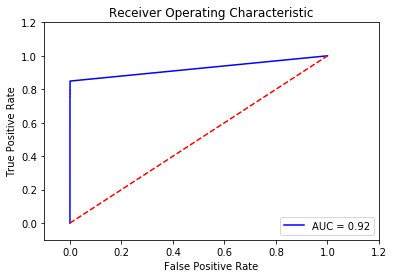

In [43]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

As we introduce more errors the AUC value goes down. There are a couple of things to remember about the roc_curve:
- There is a tradeoff betwen the TPR and FPR as we move the threshold of the classifier.
- When the test is more accurate the roc_curve is closer to the left top borders.
- A useless classifier is one that has its roc_curve exactly aligned with the diagonal.

Concerning the AUC, a simple rule of thumb to evaluate a classifier based on this summary value is the following:
- .90-1 = very good (A)
- .80-.90 = good (B)
- .70-.80 = not so good (C)
- .60-.70 = poor (D)
- .50-.60 = fail (F)

### 3. Confusion Matrix

In [44]:
y_pred = pred.round()
y_test = test['Class']
y_test_normal = y_test.value_counts()[0]
y_test_fraud = y_test.value_counts()[1]

In [45]:
def PlotConfusionMatrix(y_test, y_pred, y_test_normal, y_test_fraud):

    cfn_matrix = confusion_matrix(y_test,y_pred)
    cfn_norm_matrix = np.array([[1.0 / y_test_normal,1.0/y_test_normal],[1.0/y_test_fraud,1.0/y_test_fraud]])
    norm_cfn_matrix = cfn_matrix * cfn_norm_matrix

    fig = plt.figure(figsize=(15,5))
    ax = fig.add_subplot(1,2,1)
    sns.heatmap(cfn_matrix,cmap='coolwarm_r',linewidths=0.5,annot=True,ax=ax)
    plt.title('Confusion Matrix')
    plt.ylabel('Real Classes')
    plt.xlabel('Predicted Classes')

    ax = fig.add_subplot(1,2,2)
    sns.heatmap(norm_cfn_matrix,cmap='coolwarm_r',linewidths=0.5,annot=True,ax=ax)

    plt.title('Normalized Confusion Matrix')
    plt.ylabel('Real Classes')
    plt.xlabel('Predicted Classes')
    plt.show()
    
    print('---Classification Report---')
    print(classification_report(y_test,y_pred))

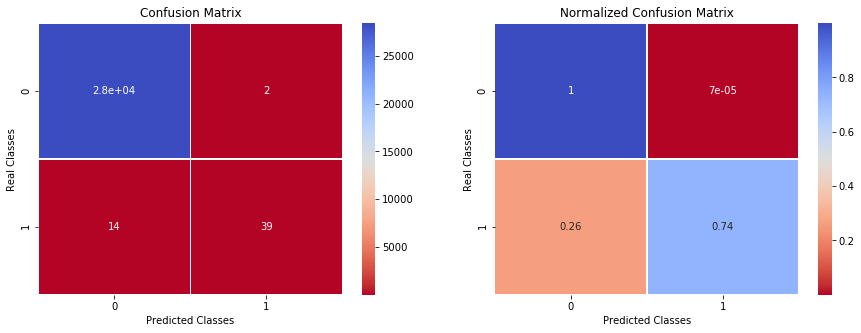

---Classification Report---
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     28428
          1       0.95      0.74      0.83        53

avg / total       1.00      1.00      1.00     28481



In [46]:
PlotConfusionMatrix(y_test,y_pred,y_test_normal,y_test_fraud)

Confusion matrix can be misleading. I almost always go directly to my classification report for precision and recall scores for each class. Our rrue positive rate is 0.83 as also shown in the classification report which is not too bad, but it's shown as blood red. The normalized confusion matrix tells a better story. 

In [47]:
from sklearn import metrics
print('1. Classification_Report: \n', metrics.classification_report(y_test,y_pred));
print('2. Confusion Matrix: \n', metrics.confusion_matrix(y_test,y_pred))
print()
print('3. Accuracy : %f' %(metrics.accuracy_score(y_test,y_pred)))
print('4. Area under the curve : %f' %(metrics.roc_auc_score(y_test,y_pred)))

1. Classification_Report: 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00     28428
          1       0.95      0.74      0.83        53

avg / total       1.00      1.00      1.00     28481

2. Confusion Matrix: 
 [[28426     2]
 [   14    39]]

3. Accuracy : 0.999438
4. Area under the curve : 0.867889


#### Conclusion:

For a PR curve, a good classifer aims for the upper right corner of the chart but upper left for the ROC curve.

While PR and ROC curves use the same data, i.e. the real class labels and predicted probability for the class lables, you can see that the two charts tell very different stories, with some weights seem to perform better in ROC than in the PR curve.

Whereas Precision ( True Positives / (True Positives + False Positives) ) is highly sensitive to False Positives and is not impacted by a large total real negative denominator.

The biggest difference among the models are at around 0.83 recall rate.Seems like a lower weight, i.e. 5 and 10, out performs other weights significantly at 0.83 recall. This means that with those specific weights, our model can detect frauds fairly well (catching 83% of fraud) while not annoying a bunch of customers with false positives with an equally high precision of 83%.

So how do we know if we should sacrifice our precision for more recall, i.e. catching fraud? That is where data science meets your core business parameters. If the cost of missing a fraud highly outweighs the cost of canceling a bunch of normal customer transactions, i.e. false positives, then perhaps we can choose a weight that gives us a higher recall rate. Or maybe catching 83% of fraud is good enough for your business if you can also minimize the "user friction" or credit card disruptions by keeping our precision high.